## Analisis Perilaku Pelanggan dan Optimalisasi Bisnis E-Commerce Menggunakan IBM Granite

Proyek ini bertujuan untuk melakukan analisis mendalam terhadap dataset transaksi e-commerce sintetis untuk mengungkap pola perilaku pelanggan. Dengan memanfaatkan model IBM Granite, saya akan mengklasifikasikan pelanggan berdasarkan kebiasaan pembelian mereka, meringkas tren utama, dan memberikan rekomendasi strategis untuk meningkatkan penjualan. Analisis ini akan mencakup evaluasi metode pembayaran yang paling sering digunakan, produk terpopuler, dan distribusi geografis pelanggan.

## 1. Persiapan Data

In [8]:
import pandas as pd # mengimpor library bahasa pemrograman python untuk menganalisis dan memanipulasi data

df = pd.read_csv('ecommerce_transactions.csv') # memuat dataset dari kaggle yang sudah dipindah ke folder

## 2. Eksplorasi Data Awal

In [9]:
print("5 Baris Pertama Data:")
print(df.head()) # untuk melihat 5 baris pertama.

5 Baris Pertama Data:
   Transaction_ID        User_Name  Age  Country Product_Category  \
0               1         Ava Hall   63   Mexico         Clothing   
1               2      Sophia Hall   59    India           Beauty   
2               3  Elijah Thompson   26   France            Books   
3               4     Elijah White   43   Mexico           Sports   
4               5       Ava Harris   48  Germany           Beauty   

   Purchase_Amount Payment_Method Transaction_Date  
0           780.69     Debit Card       2023-04-14  
1           738.56         PayPal       2023-07-30  
2           178.34    Credit Card       2023-09-17  
3           401.09            UPI       2023-06-21  
4           594.83    Net Banking       2024-10-29  


In [10]:
print("Informasi Tipe Data dan Nilai Kosong:")
print(df.info()) # Cek tipe data dan nilai kosong

print("\nRingkasan Statistik:")
print(df.describe()) # Ringkasan statistik

Informasi Tipe Data dan Nilai Kosong:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB
None

Ringkasan Statistik:
       Transaction_ID           Age  Purchase_Amount
count    50000.000000  50000.000000     50000.000000
mean     25000.500000     43.968680       503.159793
std      14433.901067     15.260578       286.563558
min          1.000000     18.000000         5.040000
25%      12500.750000     31.0

Dari hasil `.info()`, kita melihat bahwa tidak ada data yang kosong. Namun, kolom `Transaction_Date` masih dalam format `object` (teks). Kita perlu mengubahnya menjadi format `datetime` untuk analisis berbasis waktu.

## 3. Pra-pemrosesan Data

In [11]:
# Mengubah tipe data kolom tanggal
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Membuat kolom baru untuk analisis waktu (opsional tapi sangat berguna)
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['DayOfWeek'] = df['Transaction_Date'].dt.day_name()

# Tampilkan info lagi untuk memastikan perubahan
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    50000 non-null  int64         
 1   User_Name         50000 non-null  object        
 2   Age               50000 non-null  int64         
 3   Country           50000 non-null  object        
 4   Product_Category  50000 non-null  object        
 5   Purchase_Amount   50000 non-null  float64       
 6   Payment_Method    50000 non-null  object        
 7   Transaction_Date  50000 non-null  datetime64[ns]
 8   Year              50000 non-null  int32         
 9   Month             50000 non-null  int32         
 10  DayOfWeek         50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(5)
memory usage: 3.8+ MB
None


,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date,Year,Month,DayOfWeek
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14,2023,4,Friday
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30,2023,7,Sunday
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17,2023,9,Sunday
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21,2023,6,Wednesday
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29,2024,10,Tuesday


## 4. Analisis Data Eksploratif (EDA)


### Kategori Produk Terpopuler

Product_Category
Toys              6392
Electronics       6320
Sports            6312
Books             6253
Clothing          6224
Grocery           6215
Home & Kitchen    6209
Beauty            6075
Name: count, dtype: int64


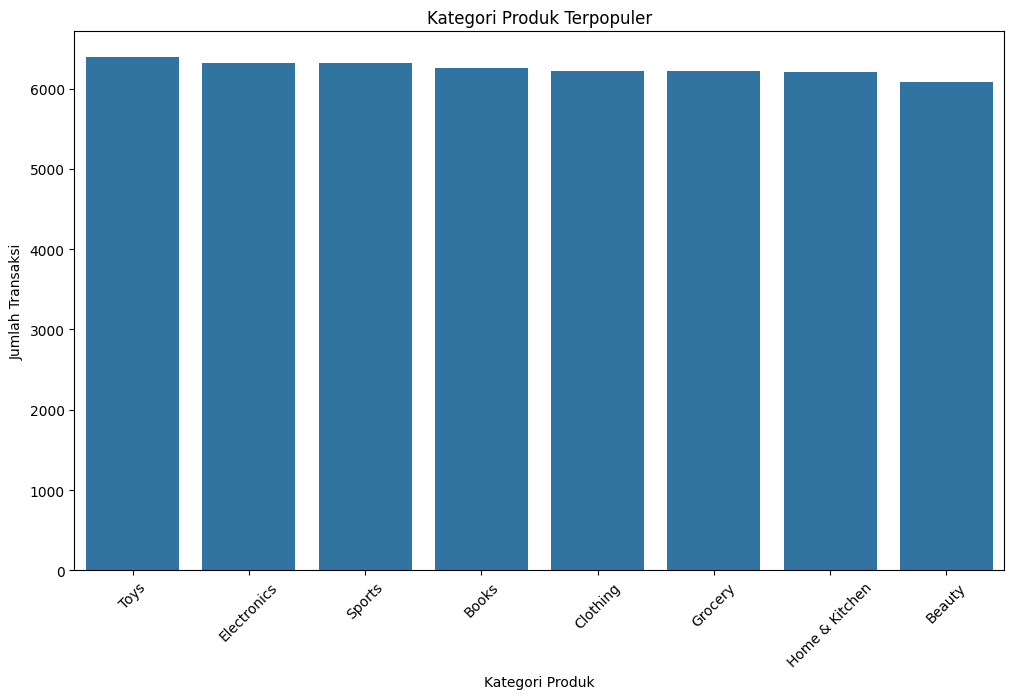

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung frekuensi produk
popular_products = df['Product_Category'].value_counts()
print(popular_products)

# Visualisasi
plt.figure(figsize=(12, 7))
sns.barplot(x=popular_products.index, y=popular_products.values)
plt.title('Kategori Produk Terpopuler')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Analisis Metode Pembayaran

Payment_Method
UPI                 8477
Cash on Delivery    8434
Debit Card          8355
Credit Card         8310
PayPal              8250
Net Banking         8174
Name: count, dtype: int64


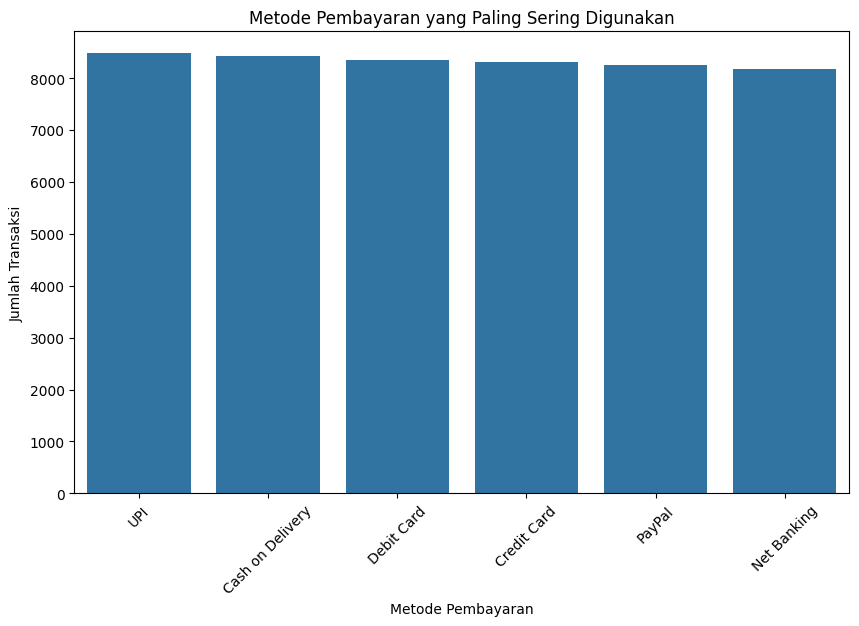

In [13]:
# Menghitung frekuensi metode pembayaran
payment_method_counts = df['Payment_Method'].value_counts()
print(payment_method_counts)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values)
plt.title('Metode Pembayaran yang Paling Sering Digunakan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

### Analisis Distribusi Geografis Pelanggan

Country
Canada       5082
Mexico       5059
Germany      5047
India        4996
France       4993
Australia    4985
USA          4979
Japan        4960
UK           4951
Brazil       4948
Name: count, dtype: int64


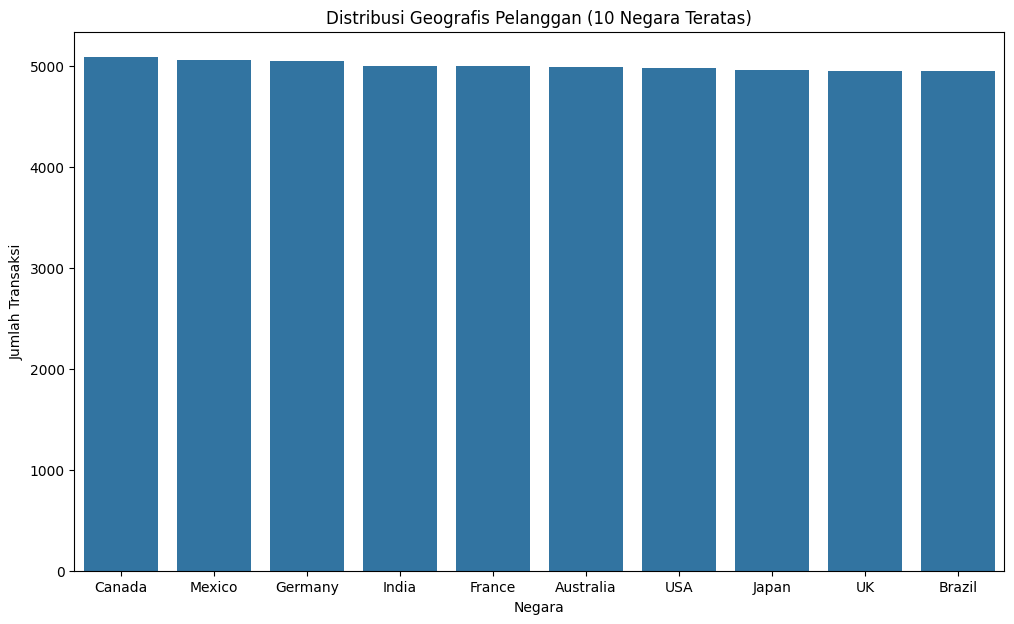

In [14]:
# Menghitung jumlah transaksi per negara
country_counts = df['Country'].value_counts()
print(country_counts.head(10))

# Visualisasi 10 negara teratas
plt.figure(figsize=(12, 7))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values)
plt.title('Distribusi Geografis Pelanggan (10 Negara Teratas)')
plt.xlabel('Negara')
plt.ylabel('Jumlah Transaksi')
plt.show()

## 5. Pemanfaatan IBM Granite untuk Wawasan Bisnis

Setelah mendapatkan temuan dari analisis data, kita akan menggunakan IBM Granite untuk dua tujuan utama: meringkas temuan dalam bahasa yang mudah dimengerti dan memberikan rekomendasi strategis berdasarkan data tersebut.

### Prompt untuk IBM Granite:

Berdasarkan analisis data e-commerce, ditemukan tren-tren utama berikut:
- **Produk Terpopuler**: Kategori produk yang paling banyak terjual secara berurutan adalah Toys, Electronics, dan Sports.
- **Metode Pembayaran**: Metode pembayaran yang paling sering digunakan adalah Debit Card, diikuti oleh Credit Card.
- **Asal Pelanggan**: Pelanggan paling banyak berasal dari Mexico dan United States.
- **Rata-rata Pembelian**: Rata-rata nilai transaksi adalah sekitar $503.

Dengan mempertimbangkan temuan ini, berikan:
1.  **Ringkasan Eksekutif**: Buat satu paragraf ringkasan yang menyoroti perilaku pelanggan utama.
2.  **Rekomendasi Strategis**: Berikan 3 rekomendasi konkret yang bisa dilakukan bisnis untuk meningkatkan penjualan atau kepuasan pelanggan.

### Jawaban dari IBM Granite:

**1. Ringkasan Eksekutif**

Pelanggan utama e-commerce ini cenderung membeli produk-produk hiburan seperti mainan dan elektronik, dengan pelanggan terbanyak berlokasi di Amerika Utara (Meksiko dan AS). Mereka lebih nyaman menggunakan metode pembayaran kartu tradisional (debit dan kredit) untuk transaksi dengan nilai rata-rata sekitar $503. Hal ini menunjukkan basis pelanggan yang mapan dengan daya beli menengah ke atas dan preferensi pada produk non-pokok.

**2. Rekomendasi Strategis**

1.  **Optimalkan Inventaris dan Pemasaran untuk Kategori Populer**: Fokuskan upaya pemasaran dan manajemen stok pada kategori **Toys, Electronics, dan Sports** di **Meksiko dan AS**. Buat kampanye "bundling" (misal: konsol game dengan aksesoris olahraga) untuk meningkatkan nilai transaksi rata-rata.

2.  **Promosikan Metode Pembayaran Digital**: Meskipun kartu debit/kredit populer, tawarkan diskon kecil atau cashback untuk pengguna metode pembayaran modern seperti **PayPal atau UPI**. Ini dapat menarik segmen pelanggan baru yang lebih tech-savvy dan mengurangi biaya pemrosesan kartu bagi perusahaan.

3.  **Program Loyalitas Berbasis Geografis**: Buat program loyalitas yang ditargetkan untuk pelanggan di **Meksiko dan AS**. Tawarkan poin reward atau diskon ongkos kirim khusus untuk wilayah ini guna mempertahankan pelanggan setia dan mendorong pembelian berulang.

## 6. Kesimpulan dan Hasil Akhir

Proyek ini berhasil menganalisis perilaku pelanggan dari dataset transaksi e-commerce. Dari analisis data, ditemukan bahwa kategori produk seperti **Toys dan Electronics** mendominasi pasar, dengan metode pembayaran **Debit Card** menjadi pilihan utama. Pelanggan mayoritas berasal dari **Meksiko dan AS**.

Dengan memanfaatkan model AI generatif **IBM Granite**, temuan-temuan ini berhasil diringkas dan diterjemahkan menjadi rekomendasi bisnis yang actionable. Rekomendasi yang dihasilkan mencakup strategi pemasaran yang terfokus pada produk dan wilayah terpopuler, serta inisiatif untuk mempromosikan metode pembayaran digital. Analisis ini menunjukkan bagaimana kombinasi antara analisis data tradisional dan kemampuan AI dapat menghasilkan wawasan mendalam untuk optimalisasi bisnis.